# JNB Lab Solutions

The United States publishes government grant opportunities to solicit eligible opportunities. The dataset of grant opportunities is updated every day and can be found at https://www.grants.gov/xml-extract to be downloaded as an xml file. In this lab, we will be classifying these grant entries into the various UN SDG goals that we talked about throughout the chapter.

## Lab Exercises, Part 1: Supervised Learning and Vectorizations

1. Use `pandas` to read in the provided xml file, which is from June 25, 2024, when this lab was first being started. You can use xml files from other days, but the solutions and exercises for this lab are based off of this file.

In [1]:
import pandas as pd
import numpy as np

#reading the xml file
df = pd.read_xml("GrantsDBExtract20240625v2.xml")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Now that we've read in the data, we can take a look at it.

In [3]:
df.head()

,OpportunityID,OpportunityTitle,OpportunityNumber,OpportunityCategory,FundingInstrumentType,CategoryOfFundingActivity,CategoryExplanation,CFDANumbers,EligibleApplicants,AdditionalInformationOnEligibility,...,CloseDateExplanation,OpportunityCategoryExplanation,EstimatedSynopsisPostDate,FiscalYear,EstimatedSynopsisCloseDate,EstimatedSynopsisCloseDateExplanation,EstimatedAwardDate,EstimatedProjectStartDate,GrantorContactName,GrantorContactPhoneNumber
0,262148,Establishment of the Edmund S. Muskie Graduate...,SCAPPD-14-AW-161-SCA-08152014,D,CA,O,Public Diplomacy,19.040,25.0,Eligibility for U.S. institutions is limited t...,...,None,None,NaN,NaN,NaN,None,NaN,NaN,None,None
1,262149,Eradication of Yellow Crazy Ants on Johnston A...,F14AS00402,D,CA,NR,None,15.608,99.0,The recipient has already been selected for th...,...,None,None,NaN,NaN,NaN,None,NaN,NaN,None,None
2,131073,"Cooperative Ecosystem Studies Unit, Piedmont S...",G12AS20003,D,CA,ST,None,15.808,25.0,This financial assistance opportunity is being...,...,None,None,NaN,NaN,NaN,None,NaN,NaN,None,None
3,131094,Plant Feedstock Genomics for Bioenergy: A Joi...,DE-FOA-0000598,D,G,ST,None,81.049,99.0,DOE Eligibility Criteria: Applicants from U.S....,...,None,None,NaN,NaN,NaN,None,NaN,NaN,None,None
4,131095,Management of HIV-Related Lung Disease and Car...,RFA-HL-12-034,D,G,HL,None,93.838,25.0,Other Eligible Applicants include the followin...,...,None,None,NaN,NaN,NaN,None,NaN,NaN,None,None


2. What variable seems to be the best for which to classify these grant applications into various UN SDGs?

3. Take the variable you've chosen above and transform it into a bag of words matrix.

In [4]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

docs = df.OpportunityTitle
cv = CountVectorizer()
cv_fit = cv.fit_transform(docs)

cv_fit

<78106x24535 sparse matrix of type '<class 'numpy.int64'>'
	with 762851 stored elements in Compressed Sparse Row format>

4. From the bag of words that you've made, identify the first ten features and print them out. 

In [5]:
feature_names = cv.get_feature_names_out()
feature_names[:10]

array(['000', '000001', '000001azerbaijan', '000002', '000003', '000008',
       '00001', '000011', '00001395', '00002413'], dtype=object)

5. Refer to the [section on Document-Term Matrices](sec2_transform_features.ipynb) to create another vectorization of the documents. Show features 100-110.

In [6]:
count_vectorizer = CountVectorizer(stop_words='english')
count_vector = count_vectorizer.fit_transform(docs).toarray()
count_vector_df_unigram = pd.DataFrame(count_vector, columns=count_vectorizer.get_feature_names_out())
term_freq = pd.DataFrame({"term": count_vector_df_unigram.columns.values, "freq" : count_vector_df_unigram.sum(axis=0)})
count_vector_df_unigram.loc[100:110,term_freq.sort_values(by="freq", ascending=False)[:10].term] # take a portion

,program,research,clinical,national,fy,trial,health,grants,development,education
100,1,1,0,0,0,0,0,0,0,0
101,0,0,0,0,0,0,0,1,1,0
102,0,0,0,0,0,0,0,0,0,0
103,0,0,0,0,0,0,3,0,0,0
104,0,0,0,0,0,0,0,0,0,0
105,0,0,0,2,0,0,0,0,1,0
106,0,0,0,0,0,0,0,0,0,0
107,0,0,0,0,0,0,0,0,0,0
108,1,0,0,0,0,0,0,0,0,0
109,0,0,0,0,0,0,0,0,0,0


6. (Bonus, if you have a strong computer) Create yet another vectorization, similar to the above, but using bigrams. Again, show features 100-110.

In [8]:
#DO NOT RUN THIS CELL UNLESS YOU HAVE BEEFY COMPUTER

count_vectorizer = CountVectorizer(ngram_range=(2,2), stop_words='english') 
count_vector = count_vectorizer.fit_transform(docs).toarray()

count_vector_df_bigram = pd.DataFrame(count_vector, columns=count_vectorizer.get_feature_names_out())
term_freq = pd.DataFrame({"term": count_vector_df_bigram.columns.values, "freq" : count_vector_df_bigram.sum(axis=0)})
count_vector_df_bigram.loc[100:110,term_freq.sort_values(by="freq", ascending=False)[:10].term] # take a portion

: 

7. Once again, make another vectorization, using the TF-IDF Vectorizer. Show features 100-110.

In [7]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
tfidf_vector = tfidf_vectorizer.fit_transform(docs).toarray()
tfidf_vector_df = pd.DataFrame(tfidf_vector, columns=tfidf_vectorizer.get_feature_names_out())
term_freq = pd.DataFrame({"term": tfidf_vector_df.columns.values, "freq" : tfidf_vector_df.sum(axis=0)})
tfidf_vector_df.loc[110:120,term_freq.sort_values(by="freq", ascending=False)[:10].term] # take a portion

,program,research,national,clinical,grants,fy,health,development,cooperative,trial
110,0.000000,0.000000,0.273389,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
111,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
112,0.167061,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
113,0.200372,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
114,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.161333,0.0,0.0
115,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
116,0.000000,0.133704,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
117,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.148290,0.0,0.0
118,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
119,0.000000,0.000000,0.000000,0.0,0.304318,0.0,0.0,0.000000,0.0,0.0


8. Using the function you made in Exercise 4 from Section 5, modify it so as to train a model on 90% of the UNSDG dataset. Then, use this model to assign predicted classes to each of the entries in the dataset using the Perceptron, Naive Bayes, and Ridge Classifier models. 

*This solution only uses Naive Bayes for simplicity; the other algorithms can easily replace the* `nb` *variable in this solution.*

In [9]:
# change this to your own data directory
data_dir = "data/"

# read and preprocess data
text_file_name = "osdg-community-data-v2023-01-01.csv"
text_df = pd.read_csv(data_dir + text_file_name,sep = "\t",  quotechar='"')
col_names = text_df.columns.values[0].split('\t')
text_df[col_names] = text_df[text_df.columns.values[0]].apply(lambda x: pd.Series(str(x).split("\t")))
text_df = text_df.astype({'sdg':int, 'labels_negative': int, 'labels_positive':int, 'agreement': float}, copy=True)
text_df.drop(text_df.columns.values[0], axis=1, inplace=True)
text_df = text_df.query("agreement > 0.5 and (labels_positive - labels_negative) > 2")
text_df.reset_index(inplace=True, drop=True)

docs = text_df.text
categories = text_df.sdg
X_train, X_test, y_train, y_test = \
    train_test_split(docs, categories, test_size=0.1, random_state=7)

X_train_count_vectorizer = CountVectorizer(ngram_range=(2,2), stop_words = "english" )
X_train_count_vectorizer.fit(X_train)  
X_train_count_vector = X_train_count_vectorizer.transform(X_train) 

#train Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train_count_vector, y_train)

#apply model to the grant titles
X_test_count_vector = X_train_count_vectorizer.transform(docs)
y_pred = nb.predict(X_test_count_vector)
print(y_pred)

[ 5  3 10 ...  4  6  3]


One thing you've probably noticed is that this dataset does not explicitly have UNSDG classes associated with it. While we can do what we did in the previous exercise for this lab, it is often not the case that we have pre-labeled data. As such, one thing we can turn to is *unsupervised learning*. This was mentioned in the [section giving an overview on machine learning](sec4_classification_algos.ipynb) and involves data that is not already labeled with the "correct" category. 

## Unsupervised Learning

Two popular algorithms for unsupervised learning revolve around what is known as *clustering*. Clustering, similar to how the name sounds, puts data points into clusters such that there is high similarity within the cluster and low similarity between different clusters. The algorithms for this are a deterministic method called $k$-means, which puts each data point into a definitive cluster, and a probabilistic method called Gaussian Mixture Modeling, which assigns probabilities for each data point belonging in any cluster.

$k$-means is described in more detail in the [chapter on linear algebra and optimization](../LinearAlgebra/KMeans/jnb2.ipynb). In practice, however, $k$-means clustering takes the following procedure:
1. Create $k$ random points to serve as centroids; you choose the value of $k$. These will be the "centers" of each of our clusters.
2. Assign each existing data point to its closest centroid. This is typically done with Euclidean distance, or 

$$
\text{dist} = \sqrt{(x_1-a_1)^2 + (x_2-a_2)^2 + ... + (x_j-a_j)^2}
$$

for data point $x$ and centroid $a$, each with $j$ features (columns in the dataset).

3. Measure the distance of each point from its assigned centroid and sum all these distances for all $n$ points. Again, this is done with Euclidean distance.
4. Re-calculate the centroid of each cluster by taking the mean vector of all points in the cluster.
5. Repeat steps 2-4 until the total distance metric changes marginally between iterations, or until the centroids do not change position between iterations.

Gaussian Mixture Modeling is similar to $k$-means, except it assigns probabilities for each point belonging to each cluster, assuming that each point follows a multivariate normal distribution from each cluster's mean point. In practice, it is performed with the Expectation-Maximization (EM) algorithm. Its procedure works as follows: 
1. Create $k$ random points to serve as means, and assign each cluster a $j \times j$ covariance matrix; this can be randomly set, but it is more common to use the identity matrix. These mean vectors and covariance matrices are the *mixture parameters*. We also need a prior probability to help with normalization in the next step, which is a single vector of length $k$ detailing the prior probability of a point belonging in any one cluster. This vector is known as the *mixing proportions*.
2. *Expectation Step*: Calculate the log-likelihood of the current data points given these randomly set parameters. This involves two main steps:
-  (a) Calculate the probability of each point belonging in each cluster using the multivariate normal probability density function. Following this, multiply these values by the respective probability found in the mixing proportions, then normalize these probabilities so that they sum to 1. These probabilities are stored in a matrix known as a *hidden matrix*.
-  (b) Take the cluster of highest probability for each point, then take the natural log of that probability. Perform that over all points, taking the sum of the natural logs. 
3. *Maximization Step*: Given the points assigned to each cluster of maximum likelihood, re-calculate the mean vector and covariance matrix for each cluster, as well as the mixing proportions. 
- To recalculate mixing proportions, take the cluster where each point has greatest probability to be in and "assign" the point that cluster. Then for each cluster, the new proportion is simply the number of points assigned to that cluster, divided by the total number of points.
- To recalculate mean vectors, for each entry in each mean vector, take the corresponding feature in the data and take the dot product of it to each of the columns in the hidden matrix. Normalize the result based on the sums of the cluster, which gives us a single value for each k; we then do that $j$ times to get the full matrix.
- To recalculate covariance matrices, for each cluster, take the deviation of each point from the mean of the cluster and use these deviations to calculate a new covariance matrix. Then normalize the entries in this covariance matrix by the sums of the probabilities for that cluster.

Clusters can be evaluated by a variety of metrics, including consulting domain experts or using Jaccard index. Evaluation of these clusters is beyond the scope of this lab.

## Lab Exercises, Part 2: Unsupervised Learning

9. Look at the documentation for $k$-means and the EM algorithm on `scikit-learn` and use these with various $k$ to cluster the grants. If you have a powerful computer, try $k = 17$ to match the number of UN SDGs.

In [ ]:
#answers for this will likely take the form of the following:
#for k-means:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(count_vector_df_unigram)
kmeans = KMeans(n_clusters=5, random_state=0).fit_predict(scaled_data)

#for Gaussian Mixture Modeling with EM Algorithm:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=5, random_state=0).fit_predict(scaled_data)

10. Look at the entries for one of the $k$-means clusters you made in the previous exercise. How similar are the entries to each other?

*Answers will vary due to the random nature of both clustering methods.*

11. Compare the entries from the previous cluster you analyzed to a different cluster. How similar are the entries in the first cluster to the ones in the new cluster?

*Answers will vary both due to the random nature of clustering, as well as depending on the chosen clusters.*

12. (Bonus) Implement $k$-means and the EM algorithm only using the `numpy` package - feel free to consult other resources for mathematical help. This exercise is not for the faint of heart but is advisable for those who want to improve their understanding of the mathematics underlying these methods!

*Implementations may vary. One example implementation is given below.*

In [ ]:
#For k-means:
import copy
def kmeans(data, k):
    #so we can't have k less than 1, or there will be problems.
    if k < 1:
        print("Invalid k-value given; k must be at least 1")
        return -1
    
    #make a dictionary to hold the classes of all the items.
    cluster_assignments = initial_new_cluster(k)

    #we also need something to hold our cluster evaluations
    evals = []

    #set our initializations
    inits = get_randinits(data, k)

    #main clustering process
    clustered = False
    #a max iterations parameter for sanity check
    maxRuns = 50
    numRuns = 0

    while clustered == False and numRuns < maxRuns:
        prev_clusters = copy.deepcopy(cluster_assignments)
        cluster_assignments = initial_new_cluster(k)
        for entry in data:
            dists = get_distances(entry, inits)
            minDist = np.min(dists)
            closest_cluster = np.where(dists == minDist)[0][0]
            cluster_assignments[closest_cluster].append(entry)

        new_centers = get_new_centers(cluster_assignments, inits)
        #check: are our centers the same?
        #if clusters_same(prev_clusters, cluster_assignments):
        if centroids_same(inits, new_centers):
            clustered = True
        else:
            inits = copy.deepcopy(new_centers)
            evals.append(eval_clusters(cluster_assignments, inits))
        numRuns += 1

    return cluster_assignments, evals

def get_randinits(data, k):
    #set min and max values per variable
    minvals = []
    maxvals = []

    #range over length of first vector
    for i in range(len(data[0])):
        current_min = data[0][i]
        current_max = data[0][i]

        #now range over all rows:
        for j in range(len(data)):
            if data[j][i] < current_min:
                current_min = data[j][i]
            if data[j][i] > current_max:
                current_max = data[j][i]

        minvals.append(current_min)
        maxvals.append(current_max)

    #okay, now we have a list of the min/max values.
    #let's make random vectors with np.random.rand(k, len(minvals))
    #to each one, we'll multiply it by the range (min - max) and add the min.
    inits = np.random.rand(k, len(minvals))
    for i in range(len(minvals)):
        current_range = maxvals[i] - minvals[i]
        inits[:, i] *= current_range
        inits[:, i] += minvals[i]

    return inits

#two helper functions: get distances, and clusters same.
def get_distances(entry, inits):
    dists = []
    for item in inits:
        currentDist = get_dist(entry, item)
        dists.append(currentDist)
    return np.array(dists)

def get_dist(entry, item):
    dist = 0.0
    for i in range(len(item)):
        dist += (entry[i] - item[i]) ** 2
    return np.sqrt(dist)

def centroids_same(c1, c2):
    same = np.all(c1 == c2)
    return same

def get_new_centers(clusters, centers):
    #we'll get the data, and the number of clusters
    newcenters = []
    clusts = clusters.keys()
    for c in clusts:
        current_clust = np.array(clusters[c])
        #for each cluster, we're going to average each variable
        new_center = []
        if len(current_clust) == 0:
            newcenters.append(centers[c])
        else:
            for i in range(len(current_clust[0])):
                new_center.append(np.average(current_clust[:, i]))
            newcenters.append(new_center)

    return np.array(newcenters)

def eval_clusters(clusters, centroids):
    score = 0
    for i in range(len(centroids)):
        current_clust = clusters[i]
        for j in current_clust:
            score += get_dist(j, centroids[i])

    return score

def initial_new_cluster(k):
    cluster_assignments = {}
    for i in range(k):
        cluster_assignments[i] = []
    return cluster_assignments 

In [ ]:
#For GMM:
def MultiVarNormal(x, mean, cov):
    """
    MultiVarNormal implements the PDF for a multivariate gaussian distribution
    (one sample at a time)
    Input:
        - x: (d,) numpy array
        - mean: (d,) numpy array; the mean vector
        - cov: (d,d) numpy array; the covariance matrix
    Output:
        prob - a scaler
    Hint:
        - Use np.linalg.det to compute determinant
        - Use np.linalg.pinv to invert a matrix
    """
    d = x.shape[0]
    pdf = 1
    # begin solution
    #added: another thing to keep in mind is that sometimes we get determinants very close to 0
    #this makes probabilities very large; much larger than 1
    #so we need to compute a pseudo-derivative if it is too small.
    mydet = np.linalg.det(cov)
    #if mydet < 1e-12:
        #pseudo determinant through evals
        #evals, evecs = np.linalg.eig(cov)
        #mydet = np.product(evals[evals > 1e-12])
        #d = np.linalg.matrix_rank(cov)

    n1 = 1.0 / np.sqrt(((2.0 * np.pi) ** d) * mydet)
    n2 = np.exp(-0.5 * (np.matmul(np.transpose(x - mean), np.matmul(np.linalg.pinv(cov), (x - mean)))))
    pdf = n1*n2
    # end solution
    return pdf

def UpdateMixProps(hidden_matrix):
    """
    Returns the new mixing proportions given a hidden matrix
    Input:
        - hidden_matrix: (n, k) numpy array
    Output:
        - mix_props: (k,) numpy array
    Hint:
        - See equation in Lecture 10 pg 42
    """
    n,k = hidden_matrix.shape
    mix_props = np.zeros(k)
    # begin solution
    for i in range(k):
        current_mean = np.mean(hidden_matrix[:,i])
        mix_props[i] = current_mean

    # end solution
    return mix_props

def UpdateMeans(X, hidden_matrix):
    """
    Update means for gaussian distributions given the data and the hidden matrix
    Input:
        - X: (n, d) numpy array
        - hidden_matrix: (n, k) numpy array
    Output:
        - new_means: (k, d) numpy array
    Hint:
        - See equation in Lecture 10 pg 43
    """
    n,d = X.shape
    k = hidden_matrix.shape[1]
    new_means = np.zeros([k,d])
    # begin solution
    #so to think about this a little bit because for some reason I am not getting this:
    #we need to, for each entry in each mean vector, take the corresponding entry in the data (entry = feature)
    #then we need to dot product it by each of the columns in the hidden matrix
    #and then normalize based on the sums of the cluster, which gives us a single value for each k
    #then do that d times to get the full matrix.
    for i in range(d): #across the columns
        current_subset = X[:,i]
        for c in range(k): #across the clusters
            current_vals = hidden_matrix[:,c]
            
            weighted_val = np.dot(current_subset, current_vals)
            total_prob = np.sum(current_vals)

            current_entry = weighted_val / total_prob

            new_means[c,i] = current_entry
    # end solution
    return new_means

def UpdateCovars(X, hidden_matrix, means):
    """
    Update covariance matrices for gaussian distributions given the data and the hidden matrix
    Input:
        - X: (n, d) numpy array
        - hidden_matrix: (n, k) numpy array
        - means: (k, d) numpy array; means for all distributions
    Output:
        - new_covs: (k, d, d) numpy array
    Hint:
        - See equation in Lecture 10 pg 43
    """
    n,d = X.shape
    k = hidden_matrix.shape[1]
    new_covs = np.zeros([k,d,d])
    # begin solution
    #to think about this:
    #first we want to range through each cluster
    for i in range(k):
        #we want to get the sum of probabilities for this cluster
        current_sum = np.sum(hidden_matrix[:,i])

        #next we want to range through each data point
        for j in range(n):
            #take the deviation from the mean of the cluster
            current_diff = X[j] - means[i]
            
            #take the probability for this data point from this cluster
            current_prob = hidden_matrix[j, i]

            #need to get the matrix - np.matmul does not work here
            #so we need to brute force this
            for a in range(d):
                for b in range(d):
                    current_cov = current_diff[a] * current_diff[b] * current_prob
                    new_covs[i][a,b] += current_cov

        #then normalize the entries
        new_covs[i] = new_covs[i] / current_sum
    # end solution
    return new_covs

def HiddenMatrix(X, means, covs, mix_props):
    """
    Computes the hidden matrix for the data.
    This function should also compute the log likelihood
    Input:
        - X: (n, d) numpy array
        - means: (k, d) numpy array; the mean vectors
        - new_covs: (k, d, d) numpy array; the covariance matrices
        - mix_props: (k,) numpy array; the mixing proportions
    Output:
        - hidden_matrix: (n, k) numpy array
        - ll: scalar; the log likelihood
    Hint:
        - Construct an intermediate matrix t of shape (n, k).
            t[i,j] = P(X_i | c = j)P(c = j), for i=1,...,n, j=1,...,k
            This matrix can be used to calculate the loglikelihood and the hidden matrix.
        - Each row of the hidden matrix sums to 1
        - hidden_matrix[i,j] = P(X_i | c = j)P(c = j) / (Sum_{l=1}^{k}(P(X_i | c = l)P(c = l))),
            for i=1,...,n, j=1,...,k
    """
    n,d = X.shape
    k = means.shape[0]
    hidden_matrix = np.zeros([n,k])
    ll = 0
    t = np.zeros([n,k]) # intermediate matrix
    
    # begin solution
    for i in range(n): #across the rows
        for c in range(k): #across the clusters
            current_mean = means[c]
            current_cov = covs[c]
            current_mix = mix_props[c]

            current_prob = MultiVarNormal(X[i, :], current_mean, current_cov)
            #current_prob = stats.multivariate_normal.pdf(X[i, :], current_mean, current_cov)
            current_entry = current_prob * current_mix

            hidden_matrix[i,c] = current_entry

    #we have the intermediate matrix, we now need to normalize so these entries sum to 1
    for i in range(n):
        current_total = np.sum(hidden_matrix[i,:])
        for j in range(k): #across the columns, which is the clusters for hidden matrix
            current_val = hidden_matrix[i,j] / current_total
            hidden_matrix[i,j] = current_val

    #now to take the log likelihood via the matrix
    for a in range(n):
        #we want the log-likelihood of the biggest value
        b = np.argmax(hidden_matrix[a,:])
        ll += np.log(hidden_matrix[a,b])

    # end solution
    return hidden_matrix,ll

def GMM(X, init_means, init_covs, init_mix_props, thres=0.001):
    """
    Runs the GMM algorithm
    Input:
        - X: (n, d) numpy array
        - init_means: (k,d) numpy array; the initial means
        - init_covs: (k,d,d) numpy arry; the initial covariance matrices
        - init_mix_props: the initial mixing proportions
    Output:
        - clusters: (n,) numpy array; the cluster assignment for each sample
        - hidden_matrix: (n, k) numpy array
        - ll_list: the log likelihood at all iterations
    Hint:
        - Use all above functions
        - Stoping condition: the difference between your ll from the current iteration
            and the last iteration is below your threshold
        - You can set maximum iteration as 1,000 to avoid infinite loop
        - Remember to check if your algorithm has converged
    """
    n,d = X.shape
    k = init_means.shape[0]
    clusters = np.zeros(n)
    ll_list = []
    # begin solution
    threshold_met = False
    current_iter = 0
    current_means = init_means
    current_covs = init_covs
    current_mix = init_mix_props
    while threshold_met != True:
        #first: get the hidden matrix and log-likelihood
        current_hidden, current_ll = HiddenMatrix(X, current_means, current_covs, current_mix)
        ll_list.append(current_ll)

        #second: update all parameters
        current_means = UpdateMeans(X, current_hidden)
        current_covs = UpdateCovars(X, current_hidden, current_means)
        current_mix = UpdateMixProps(current_hidden)

        #third: check if our threshold is met
        #or if we have only run one time.
        if current_iter == 0:
            current_iter += 1
        elif np.abs(ll_list[current_iter] - ll_list[current_iter - 1]) < thres:
            threshold_met = True
        else:
            current_iter += 1

    #now we need to put each point into a cluster
    for j in range(n):
        largest_prob_cluster = np.argmax(current_hidden[j, :])
        clusters[j] = largest_prob_cluster
    # end solution
    return clusters,current_hidden,ll_list

## Lab Exercises, Part 3: Similarity

13. Construct a heatmap for 40 of the grants in the dataset. 

In [3]:
#for this part: I am switching kernels and will put in some of the setup in this
#hidden cell.
import pandas as pd
import numpy as np

df = pd.read_csv("GrantsDBExtract20240625v2.csv")[:10000]

/var/folders/px/b7vc3nh913zb_m0x36ncftj00000gn/T/ipykernel_68678/3899229267.py:6: DtypeWarning: Columns (33,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("GrantsDBExtract20240625v2.csv")[:10000]


2024-07-15 21:10:45.922395: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype string
	 [[{{node inputs}}]]


<Axes: >

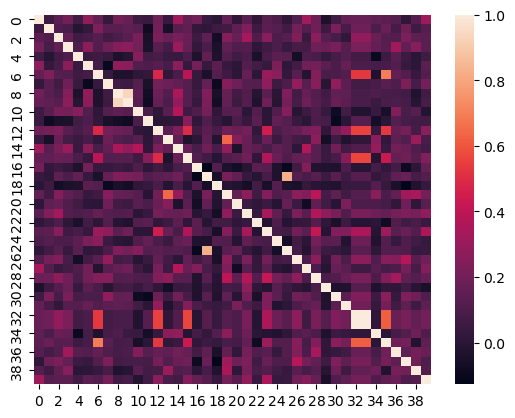

In [5]:
import tensorflow as tf
import tensorflow_hub as hub

# change this to your own embedding directory
embedding_dir = ""

# load the embedding
embed = hub.load(embedding_dir + "universal-sentence-encoder_4")

df["embedding"] = list(embed(df.OpportunityTitle))

#make heatmap of similarities
import seaborn as sns
sns.heatmap(np.array(np.inner(df.embedding[:40].tolist(), 
                              df.embedding[:40].tolist())))


14. Isolate twenty of the entries, then write a function that will take one of these twenty entries and an integer $k$ as an input; the function will return the $k$ most similar entries in the rest of the dataset.

*The function and its setup are given as follows:*

In [11]:
test_set = df[:20]
train_set = df[20:]

def get_most_similar(text_df, point, n = 5):
    sentence = point.OpportunityTitle
    sentence_sim = np.inner(list(text_df.embedding), embed([sentence]))
    val = sorted(sentence_sim, reverse=True)[n]
    return text_df[sentence_sim > val].OpportunityTitle

print("Grants most similar to grant", test_set.iloc[0].OpportunityTitle)
get_most_similar(train_set, test_set.iloc[0])

Grants most similar to grant Establishment of the Edmund S. Muskie Graduate Internship Program


427     Internship Training Program Interior Museum Pr...
3015                  Career Discovery Internship Program
7994                Mosaics in Science Internship Program
7995                Mosaics in Science Internship Program
8964                      Buiness Plan Internship Program
Name: OpportunityTitle, dtype: object

## Generative AI and Language Models
With the rise of generative AI and large language models like the GPT-system of models developed by OpenAI, it is easier than ever to give a model a string of text and have it classify these texts into predicted UN SDGs. 

So how exactly do these models work? The exact mathematical theory behind these models is highly complex as they build on years of research on AI, natural language processing, and machine learning. We mention generative text models briefly in [a previous section](sec2_transform_features.ipynb), and state that these models are similar to probabilistic language models but are *generative* in the sense that they will generate the next word in the sequence based on a highly complex model.

We won't have you recreate any generative AI programs here. Instead, we will provide a quick guide through best practices to use them in the context of text classification. 

The guiding principle is to **be as specific as possible and narrow the desired task as much as you can.** Expect that you will sometimes get incorrect results, or ones that do not align with the task you intended. As you go, iterate and fine-tune the prompts so that they become more specific.

Additionally, some advanced prompting techniques exist, including few-shot prompting and chain-of-thought prompting, which provides some examples for the LLM or guides the LLM through a few reasoning steps, respectively.

## Lab Exercises, Part 4: Generative AI and Language Models

15. Use a LLM available online, such as ChatGPT, and ask it what UNSDGs it predicts some of the grants to fall under using simple question asking. For example, "For a grant with the title __________, what UNSDG aligns best with the grant?" Do the classifications make sense?

*Answers may vary but should make sense if an advanced LLM is used.*

16. Use few-shot prompting to classify some other grants. Utilize your own previous classification models (or your own classifications) to provide shots to the prompt. For example, "The grant titled _____________ falls under UN SDG _____. The grant titled __________ falls under which UNSDG?" Compare the classifications from this step with the classifications from the previous step.

*Answers may vary but should make sense if an advanced LLM is used. Prompts should also follow the format specified in this question.*

17. (Bonus) Check out the following additional resources for more details on LLM prompting. Code along with the code provided on the pages and provide your resulting notebooks to answer this question. Extend the principles found in resources to some of these grant titles as well.

- [https://cookbook.openai.com/examples/multiclass_classification_for_transactions](https://cookbook.openai.com/examples/multiclass_classification_for_transactions): a resource from OpenAI, utilizing the capabilities of some of their own models, to classify text documents
- [https://huggingface.co/docs/transformers/main/tasks/prompting](https://huggingface.co/docs/transformers/main/tasks/prompting): a resource from HuggingFace, a package we used in this section, that talks more about general LLM prompting.

*Answers should follow the code examples given on the websites.*